In [1]:
from landaunet import geom, _core
from landaunet.geom import UnitNormVec3RF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
space = UnitNormVec3RF(N=2, mostly_z=0.9)

In [3]:
def topolar(x,y, ctr=(0,0)):
    r = np.sqrt((x-ctr[0])**2 + (y-ctr[1])**2)
    phi = np.arctan2(y-ctr[1], x-ctr[0])
    return r, phi

def fund_vortex(X, Y, a, v, scale=1.0, ctr=(0,0)):
    r, phi = topolar(X, Y, ctr=ctr)
    r_scale = r  / scale
    M1 = (2*v*a*r_scale)/(r_scale**2+a**2) * np.sin(phi)
    M2 = -(2*v*a*r_scale)/(r_scale**2+a**2) * np.cos(phi)
    M3 = (r_scale**2-a**2)/(r_scale**2+a**2)
    return np.stack([M1,M2,M3], axis=0)
    

In [30]:
r = space.random(1)
n=50

x = np.arange(0,1,1/n)
X, Y = np.meshgrid(x,x)
pts = np.hstack([X.flatten()[:,None],Y.flatten()[:,None]])

vtx = fund_vortex(X,Y, 0.1, 1, scale=1, ctr=(0.5,0.5))
fn=vtx

def testfn2(X,Y):
    return np.stack([np.sin(2*np.pi*X), np.cos(2*np.pi*Y), np.zeros_like(X)], axis=0)



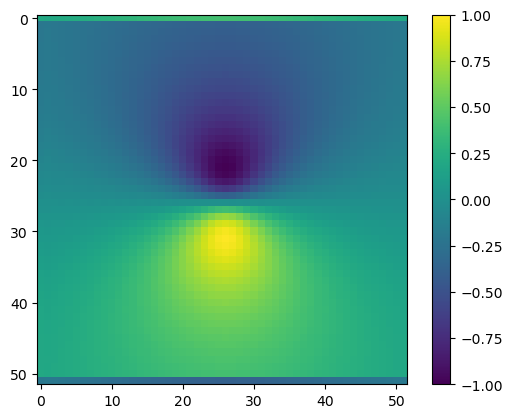

In [35]:
pd = geom.Periodic2D(n,n,0.025,2,data=fn)
pd.setup_data()
plt.imshow(pd.data[0])
plt.colorbar()
plt.show()

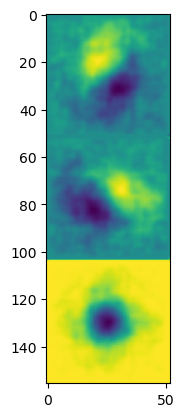

In [36]:
ims = []
fig, ax = plt.subplots()
for k in range(100000):
    pd.step()
    if k % 400 == 0:
        im = ax.imshow(np.reshape(pd.data,(3*(n+2),(n+2))), animated=True)
        ims.append([im])


In [37]:
ani = animation.ArtistAnimation(fig, ims, interval=30, blit=True,
                                repeat_delay=1000)
from IPython.display import HTML
HTML(ani.to_html5_video())